Robust MPC: Simulation with linearized rocket system

In [1]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import sys, os
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [2]:
from src.rocket import Rocket
from src.pos_rocket_vis import *

# Require ipympl
%matplotlib widget 

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

# Rocket setup
Ts  = 1/20
rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
rocket.mass = 1.7 # Do not change!!!

# Visualization setup
vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1

sim_time = 15  # simulation length in seconds

omega_x0 = 0; omega_y0 = 0; omega_z0 = 0; alpha0 = 0; beta0 = 0; gamma0 = np.deg2rad(30); v_x0 = 0; v_y0 = 0; v_z0 = 0; p_x0 = 3; p_y0 = 2; p_z0 = 10
x0 = np.array([omega_x0, omega_y0, omega_z0, alpha0, beta0, gamma0, v_x0, v_y0, v_z0, p_x0, p_y0, p_z0])

omega_x_target = 0; omega_y_target = 0; omega_z_target = 0; alpha_target = 0; beta_target = 0; gamma_target = 0; v_x_target = 0; v_y_target = 0; v_z_target = 0; p_x_target = 1; p_y_target = 0; p_z_target = 3; 
x_target = np.array([omega_x_target, omega_y_target, omega_z_target, alpha_target, beta_target, gamma_target, v_x_target, v_y_target, v_z_target, p_x_target, p_y_target, p_z_target]) 

xs, us = rocket.trim(x_target)
print("Linearization around a steady state:")
print("x_ref = ", x_target)
print("xs = ", xs)
print("us = ", us)
sys = rocket.linearize_sys(xs, us)
A, B = sys.A, sys.B


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Linearization around a steady state:
x_ref =  [0 0 0 0 0 0 0 0 0 1 0 3]
xs =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 3.]
us =  [ 0.          0.         56.66666667  0.        ]


Subsystem z: 

Input upper bounds are [80.]
Input lower bounds are [40.]
State upper bounds are [inf inf]
State lower bounds are [-inf   0.] 

||A+BK||^1 = 3.264336650642937
Not yet convgerged at iteration 1
||A+BK||^2 = 3.8489841422072493
Not yet convgerged at iteration 2
||A+BK||^3 = 3.475554733103938
Not yet convgerged at iteration 3
||A+BK||^4 = 2.798773506157213
Not yet convgerged at iteration 4
||A+BK||^5 = 2.1149733053665365
Not yet convgerged at iteration 5
||A+BK||^6 = 1.5349218325134846
Not yet convgerged at iteration 6
||A+BK||^7 = 1.083228993117122
Not yet convgerged at iteration 7
||A+BK||^8 = 0.7489460620079644
Not yet convgerged at iteration 8
||A+BK||^9 = 0.5097711445277127
Not yet convgerged at iteration 9
||A+BK||^10 = 0.3427123082554728
Not yet convgerged at iteration 10
||A+BK||^11 = 0.22810718597769275
Not yet convgerged at iteration 11
||A+BK||^12 = 0.1505776850563822
Not yet convgerged at iteration 12
||A+BK||^13 = 0.09871209205206852
Not yet convgerged at iterat

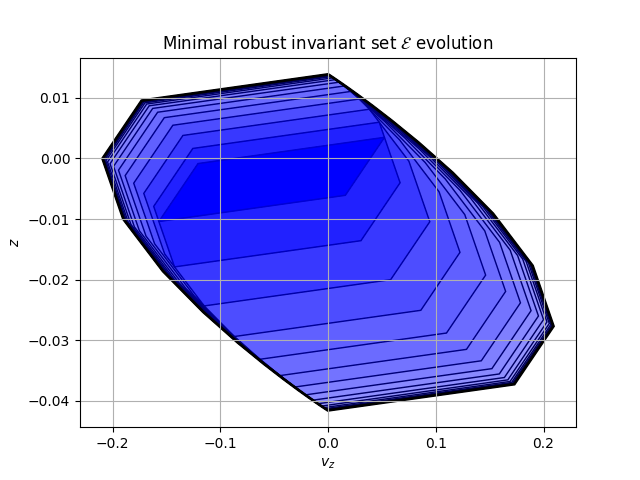

U_tilde bounds : [ 60.68505069 -49.30972855]
Not yet converged at iteration 1
Not yet converged at iteration 2
Not yet converged at iteration 3
Not yet converged at iteration 4
Not yet converged at iteration 5
Not yet converged at iteration 6
Not yet converged at iteration 7
Not yet converged at iteration 8
Not yet converged at iteration 9
Not yet converged at iteration 10
Maximum invariant set found after 11 iterations!



In [3]:
from MPCControl_z_D6_1 import MPCControl_z
H = 7
mpc = MPCControl_z(A, B, xs, us, Ts, H)

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=299, step=2), IntSlider(value=0…

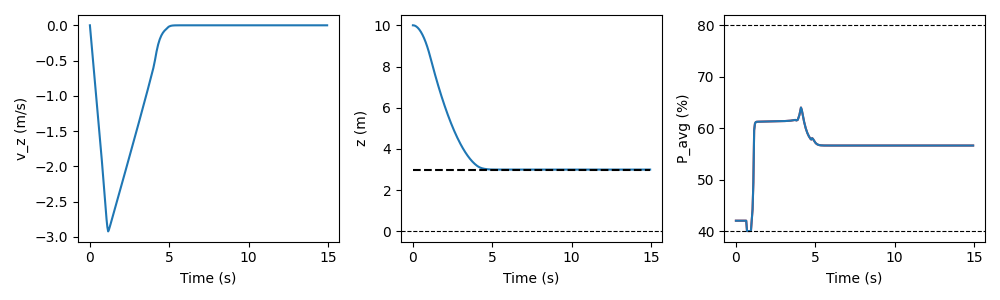

In [4]:
# Here, subsystem only returns the closed-loop states and inputs related to that subsystem. In this case, we have subsystem z that returns 
# state v_z, position z and input P_avg, while all the other states are kept to 0.

# below, x0 is the full initial state (reduced to subsystem states in a later stage)

# No noise scenario
t_cl, x_cl, u_cl = rocket.simulate_subsystem(mpc, sim_time, x0, w_type='no_noise')
vis.animate(t_cl[:-1], x_cl[:,:-1], u_cl)
plot_static_states_inputs(t_cl[:-1], x_cl[:,:-1], u_cl, xs, 'sys_z')


AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=299, step=2), IntSlider(value=0…

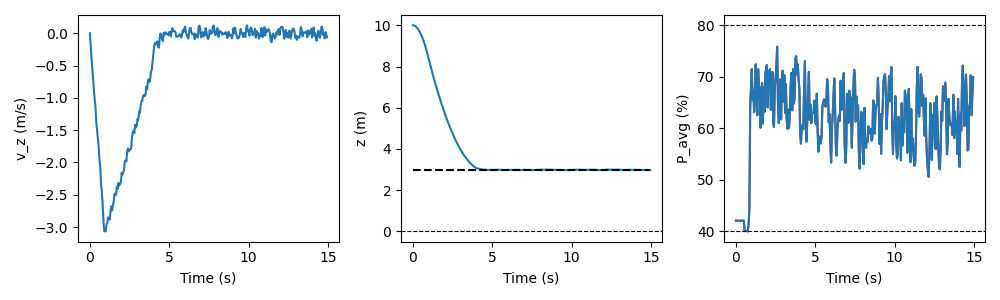

In [5]:
# Random noise scenario
t_cl, x_cl, u_cl = rocket.simulate_subsystem(mpc, sim_time, x0, w_type='random')
vis.animate(t_cl[:-1], x_cl[:,:-1], u_cl)
plot_static_states_inputs(t_cl[:-1], x_cl[:,:-1], u_cl, xs, 'sys_z')

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=299, step=2), IntSlider(value=0…

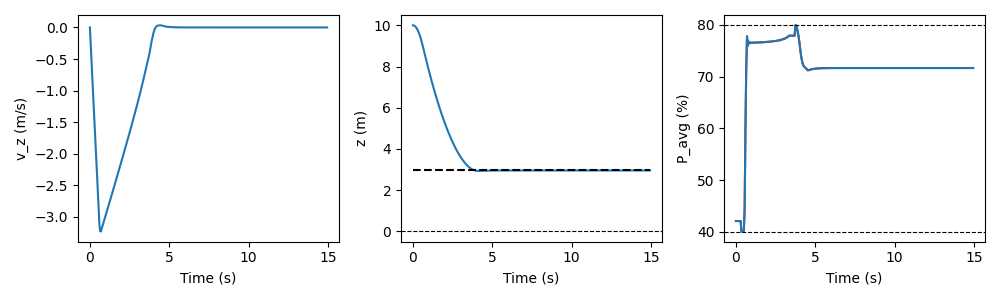

In [6]:
# Extreme noise
t_cl, x_cl, u_cl = rocket.simulate_subsystem(mpc, sim_time, x0, w_type='extreme')
vis.animate(t_cl[:-1], x_cl[:,:-1], u_cl)
plot_static_states_inputs(t_cl[:-1], x_cl[:,:-1], u_cl, xs, 'sys_z')

Error set is of dimension 2


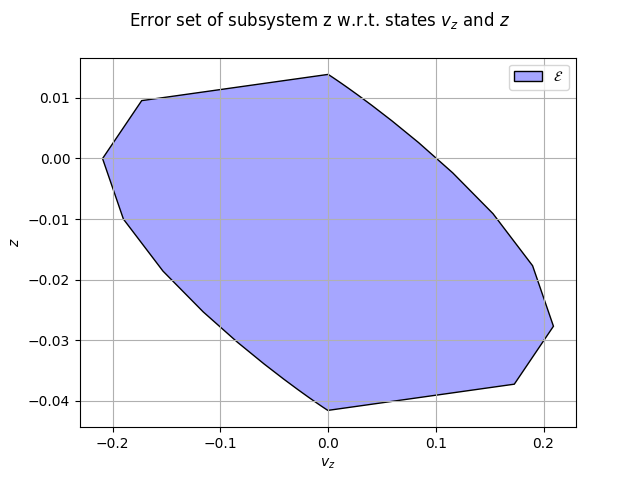

Terminal set is of dimension 2


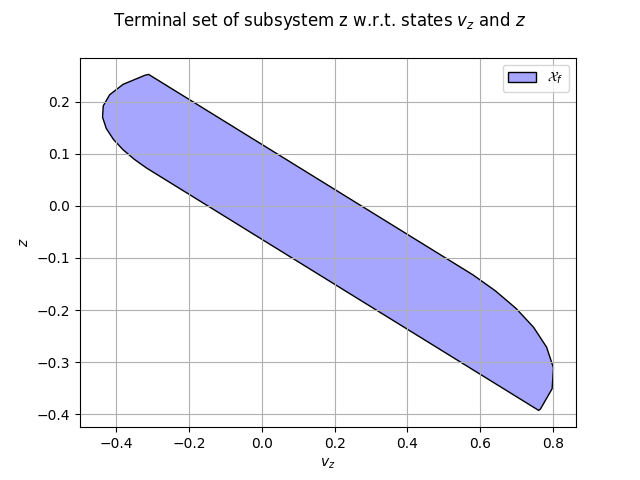

U_tidle is of dimension 1


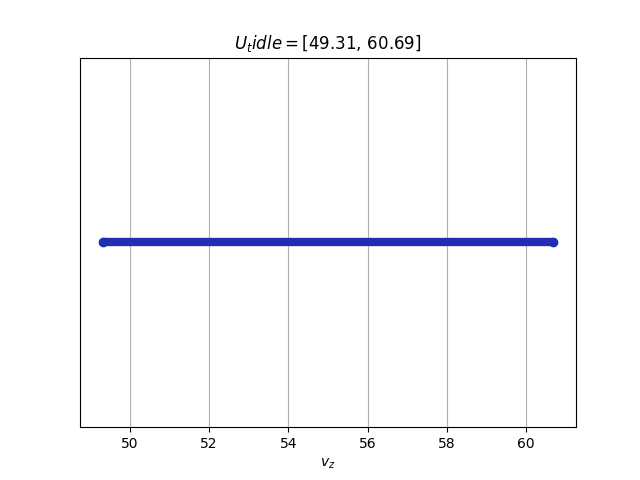

[[49.30972855]
 [60.68505069]]


In [7]:
# Plots for Minimal robust invariant set, terminal set and U_tilda
mpc.plot_set(mpc.E, 'Error set')
mpc.plot_set(mpc.X_f_tilde_delta, 'Terminal set')
mpc.plot_set(mpc.U_tilde, 'U_tidle')
print(mpc.U_tilde.Vrep.V)